In [91]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv


In [92]:
df1=pd.read_csv("../input/bengaluru-house-price-data/Bengaluru_House_Data.csv")

In [93]:
df1.shape

(13320, 9)

In [94]:
df1.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [95]:
df1.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [96]:
df1.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [97]:
df1["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [98]:
df1.isnull()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
13315,False,False,False,False,False,False,False,False,False
13316,False,False,False,False,True,False,False,True,False
13317,False,False,False,False,False,False,False,False,False
13318,False,False,False,False,False,False,False,False,False


In [99]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [100]:
df2=df1.dropna()

In [101]:
df2.shape

(7496, 9)

In [102]:
df2.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [103]:
df2.groupby("society")["society"].agg("count")

society
3Codeli    2
7 ise P    1
A idse     2
A rtsai    1
ACersd     1
          ..
Zonce E    2
Zostaa     3
i1ncyRe    1
i1odsne    1
i1rtsCo    3
Name: society, Length: 2592, dtype: int64

In [104]:
df2.bath.unique().sum()

37.0

In [105]:
df3=df2.drop(["area_type","society","availability","balcony"],axis="columns")

In [106]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
5,Whitefield,2 BHK,1170,2.0,38.00
11,Whitefield,4 Bedroom,2785,5.0,295.00


In [107]:
df3.shape

(7496, 5)

In [108]:
df3["bhk"]=df3["size"].apply(lambda x: int(x.split(' ')[0]))

In [109]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
5,Whitefield,2 BHK,1170,2.0,38.00,2
11,Whitefield,4 Bedroom,2785,5.0,295.00,4


In [110]:
df3.groupby("bhk")["bhk"].agg("count")

bhk
1      363
2     3427
3     3132
4      540
5       25
6        6
7        1
9        1
11       1
Name: bhk, dtype: int64

In [111]:
df3.groupby("bath")["bath"].agg("count")

bath
1.0     428
2.0    4283
3.0    2063
4.0     458
5.0     184
6.0      73
7.0       4
9.0       3
Name: bath, dtype: int64

In [112]:
df3.groupby("total_sqft")["total_sqft"].agg("count")

total_sqft
1000           78
1000 - 1285     1
10000           1
1002            2
1003            1
               ..
993             3
994             3
995             4
996             3
999             1
Name: total_sqft, Length: 1682, dtype: int64

In [118]:
df3.total_sqft.unique()

array(['1056', '2600', '1521', ..., '1919', '2111', '4689'], dtype=object)

In [119]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [114]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [121]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,59.935,2
850,Bannerghatta Road,2 BHK,1115 - 1130,2.0,58.935,2


In [116]:
df4=df3.copy()

In [120]:
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)

In [122]:
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3


In [123]:
df4.total_sqft.unique()

array([1056., 2600., 1521., ..., 1919., 2111., 4689.])

In [124]:
df4["price_per_sqft"]=df4["price"]*100000/df4["total_sqft"]

In [125]:
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
11,Whitefield,4 Bedroom,2785.0,5.0,295.00,4,10592.459605


In [126]:
df5=df4.copy()

In [129]:
len(df5["location"].unique())

634

In [138]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield          398
Sarjapur  Road      310
Electronic City     238
Kanakpura Road      216
Thanisandra         215
                   ... 
Jakkasandra           1
Jai Bheema Nagar      1
Jagadish Nagar        1
Immadihalli           1
1 Giri Nagar          1
Name: location, Length: 626, dtype: int64

In [141]:
len(location_stats[location_stats<10])

472

In [142]:
location_stats_less_than_10=location_stats[location_stats<10]
location_stats_less_than_10

location
Kalkere             9
Narayanapura        9
Kodigehaali         9
Nehru Nagar         9
Mico Layout         9
                   ..
Jakkasandra         1
Jai Bheema Nagar    1
Jagadish Nagar      1
Immadihalli         1
1 Giri Nagar        1
Name: location, Length: 472, dtype: int64

In [143]:
df5['location']=df5['location'].apply(lambda x: 'others' if x in location_stats_less_than_10 else x)

In [145]:
location_stats_new = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats_new

location
others                    1333
Whitefield                 398
Sarjapur  Road             310
Electronic City            238
Kanakpura Road             216
                          ... 
BTM Layout                  10
Prithvi Layout              10
Vidyaranyapura              10
Mallasandra                 10
Banashankari Stage III      10
Name: location, Length: 155, dtype: int64

In [146]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
349,others,3 Bedroom,11.0,3.0,74.0,3,672727.272727
480,others,4 BHK,1150.0,4.0,260.0,4,22608.695652
483,others,5 Bedroom,1200.0,5.0,190.0,5,15833.333333
1239,Electronic City,2 BHK,550.0,1.0,16.0,2,2909.090909
2040,Electronic City,2 BHK,550.0,1.0,15.0,2,2727.272727


In [148]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]


In [149]:
df6[df6.total_sqft/df6.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft


In [150]:
df6.price_per_sqft.describe()

count     7439.000000
mean      5851.020195
std       2705.465697
min        371.428571
25%       4283.397683
50%       5319.284802
75%       6693.881632
max      76530.612245
Name: price_per_sqft, dtype: float64

In [152]:
df6.shape

(7454, 7)

In [151]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(5844, 7)

In [153]:
df7.price_per_sqft.describe()

count     5844.000000
mean      5457.866014
std       1655.988421
min       2090.909091
25%       4331.590739
50%       5240.174672
75%       6354.608051
max      15748.339195
Name: price_per_sqft, dtype: float64

In [154]:
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

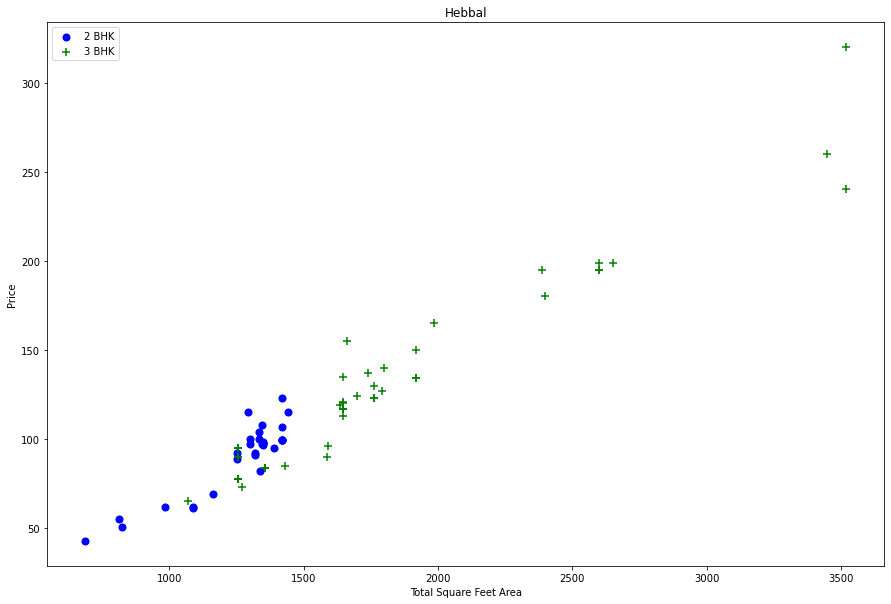

In [155]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Hebbal")

In [156]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
    
df8 = remove_bhk_outliers(df7)
df8.shape

(4100, 7)

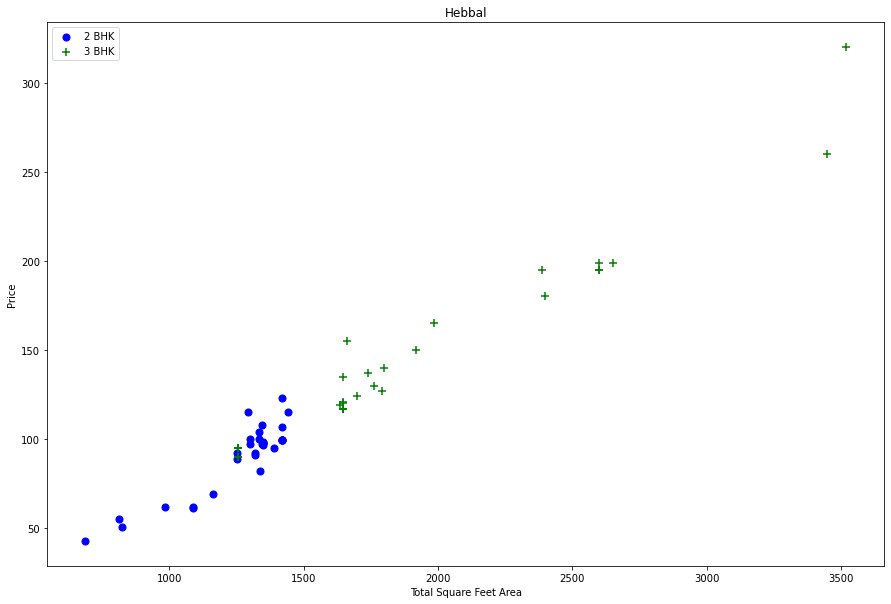

In [157]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

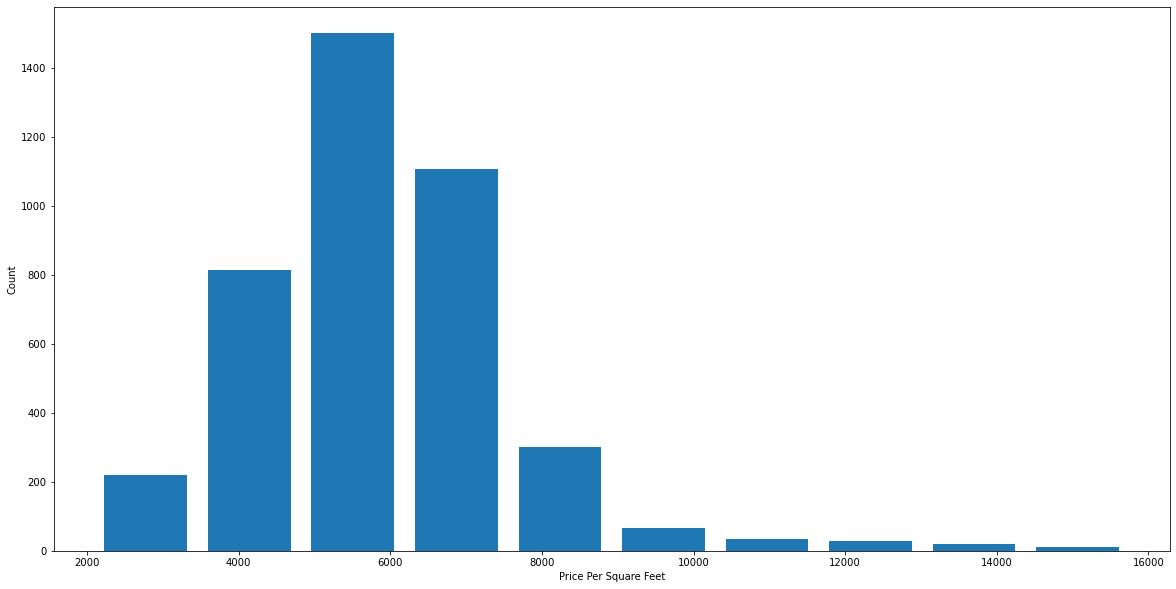

In [158]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft,rwidth = 0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [159]:
df8.bath.unique()

array([4., 3., 2., 5., 1., 6., 7., 9.])

In [160]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft


Text(0, 0.5, 'Count')

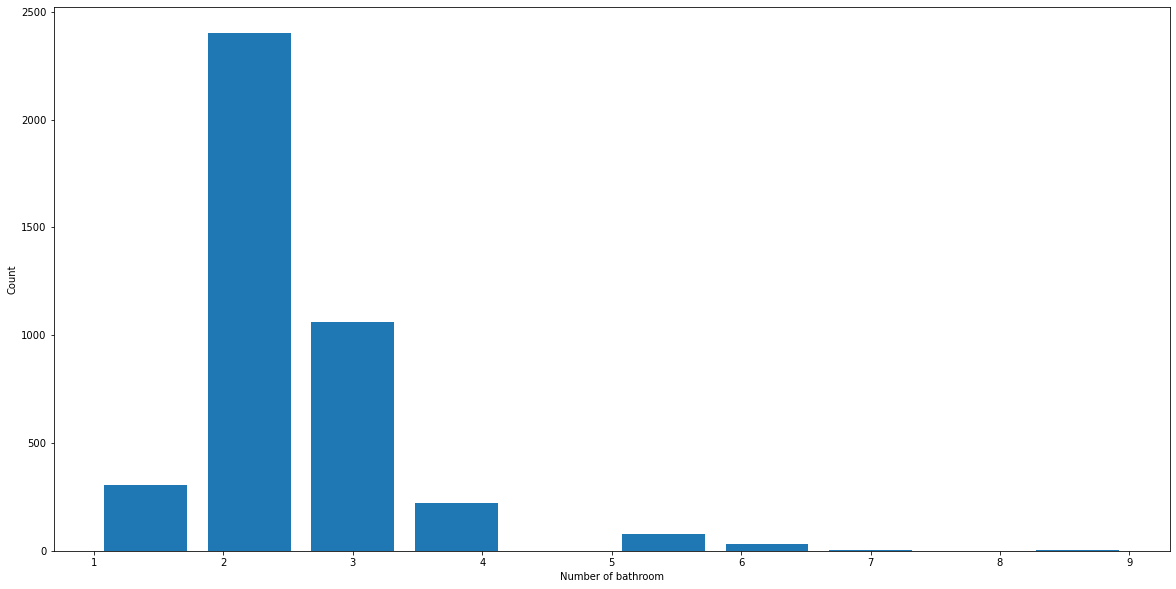

In [161]:
plt.hist(df8.bath,rwidth = 0.8)
plt.xlabel("Number of bathroom")
plt.ylabel("Count")

In [162]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3864,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
4924,others,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [164]:
df9 = df8[~(df8.bath>df8.bhk+2)]
df9.shape

(4098, 7)

In [165]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(10)

,location,total_sqft,bath,price,bhk
0,1st Phase JP Nagar,2825.0,4.0,250.0,4
1,1st Phase JP Nagar,1875.0,3.0,167.0,3
2,1st Phase JP Nagar,1394.0,2.0,100.0,2
3,1st Phase JP Nagar,1077.0,2.0,93.0,2
4,1st Phase JP Nagar,1590.0,3.0,131.0,3
5,1st Phase JP Nagar,2180.0,3.0,210.0,3
6,1st Phase JP Nagar,2077.0,3.0,175.0,3
7,1st Phase JP Nagar,1205.0,2.0,85.0,2
8,1st Phase JP Nagar,2615.0,5.0,222.0,4
9,5th Phase JP Nagar,1150.0,3.0,52.5,2


In [166]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
df11 = pd.concat([df10,dummies.drop('others',axis='columns')],axis='columns')
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1st Phase JP Nagar,2825.0,4.0,250.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Phase JP Nagar,1875.0,3.0,167.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Phase JP Nagar,1394.0,2.0,100.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
df12 = df11.drop('location', axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Tumkur Road,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,250.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,167.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
df12.shape

(4098, 158)

In [171]:
X = df12.drop('price', axis='columns')
X.head()

,total_sqft,bath,bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,...,Tumkur Road,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1394.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1077.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1590.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
Y = df12.price
Y.head()

0    250.0
1    167.0
2    100.0
3     93.0
4    131.0
Name: price, dtype: float64

In [177]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [178]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)
regressor.score(X_test,Y_test)

0.9331980832560842

In [179]:
def predict_values(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return regressor.predict([x])[0]

In [180]:
predict_values('1st Phase JP Nagar', 1000, 2, 2)

94.39445730892862

In [181]:
import pickle
with open('Bengaluru_house_model.picle', 'wb') as f:
    pickle.dump(regressor,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))